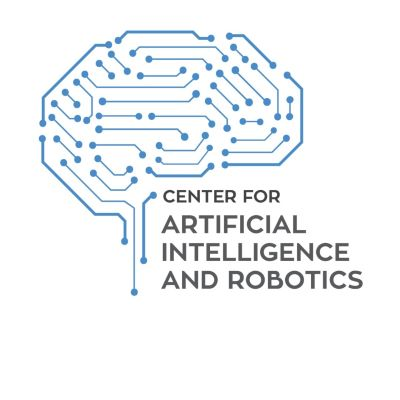

# Decision Trees and Random Forests Project

<div style="direction:rtl">
دیتاست مربوط به یک بنگاه مالی می باشد و هدف ما این است که حدس بزنیم آیا در صورت پرداخت وام به مشتری، آن را به ما بر می گرداند یا خیر.

## Import Libraries

<div style="direction:rtl">
کتابخانه های مورد نیاز را ایمپورت کنید.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data

<div style="direction:rtl">
دیتاست مورد نظر را فرخوانی کنید و نگاه خلاصه ای به آن بیندازید و همچنین اطلاعات کلی و آماری آن را نمایش دهید.

In [4]:
loans = pd.read_csv('C://Users//abbas//Desktop//files/loan_data.csv')

In [5]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


<div style="direction:rtl">
 و اما هر کدام از فیچر های بالا معرف مشخصات زیر می باشند. برای تمرین بیشتر و کسب آمادگی برای مواجهه با دیتاست های غیر آموزشی، این توضیحات به زبان اصلی ارائه می گردند.

* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [6]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [8]:
loans[loans['dti']==0]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
32,1,home_improvement,0.0743,155.38,11.918391,0.0,777,7128.958333,6053,19.5,0,0,0,0
43,1,home_improvement,0.1028,97.20,12.206073,0.0,677,3779.958333,0,0.0,0,1,0,0
112,1,all_other,0.0743,117.31,11.695247,0.0,772,3929.958333,0,0.0,1,0,0,0
130,1,small_business,0.1217,166.48,9.210340,0.0,662,2250.000000,875,54.7,2,1,0,1
174,1,home_improvement,0.0712,92.80,11.440355,0.0,812,8250.000000,368,1.2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8438,0,educational,0.0800,15.67,8.101678,0.0,747,570.000000,0,0.0,0,0,0,0
8976,0,major_purchase,0.1411,71.89,9.998798,0.0,727,870.000000,312,4.2,3,0,0,0
9011,0,educational,0.1947,184.49,9.210340,0.0,682,541.000000,0,0.0,0,0,0,0
9437,0,major_purchase,0.1461,124.12,10.239960,0.0,692,1530.041667,0,0.0,6,0,0,0


## Exploratory Data Analysis (EDA)

<div style="direction:rtl">
حالا کمی در دیتاست گشت و گذار کنیم (تحلیل اکتشافی) تا ببینیم به چه اطلاعاتی دست پیدا می کنیم.

<div style="direction:rtl">
هیستوگرام فیچر fico را با تفکیک credit.policy در قالب دو نمودار روی هم ترسیم نمایید.

Text(0.5, 0, 'FICO')

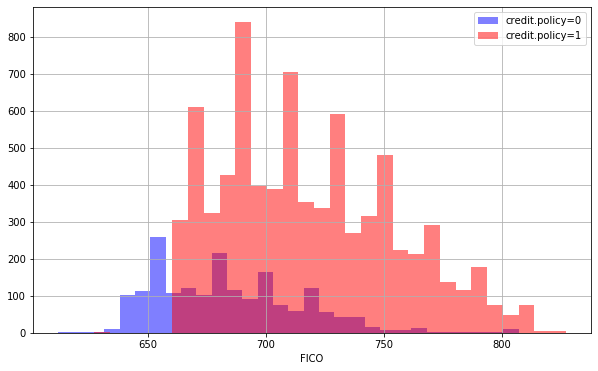

In [19]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='blue',bins=30,label='credit.policy=0')
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='red',bins=30,label='credit.policy=1')
plt.legend()
plt.xlabel('FICO')

<div style="direction:rtl">
همان نمودار بالا را این بار با تفکیک لیبل یا همان not.fully.paid ترسیم نمایید.

Text(0.5, 0, 'FICO')

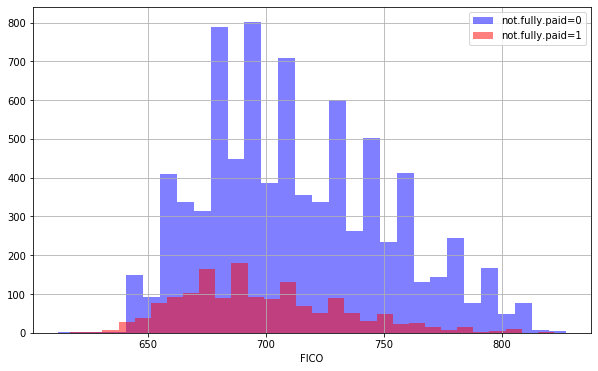

In [21]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='blue',bins=30,label='not.fully.paid=0')
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='red',bins=30,label='not.fully.paid=1')
plt.legend()
plt.xlabel('FICO')

<div style="direction:rtl">
نمودار countplot را برای فیچر purpose با تفکیک مشتریانی که موفق به بازپرداخت وام شدند یا نشدند ترسیم نمایید.

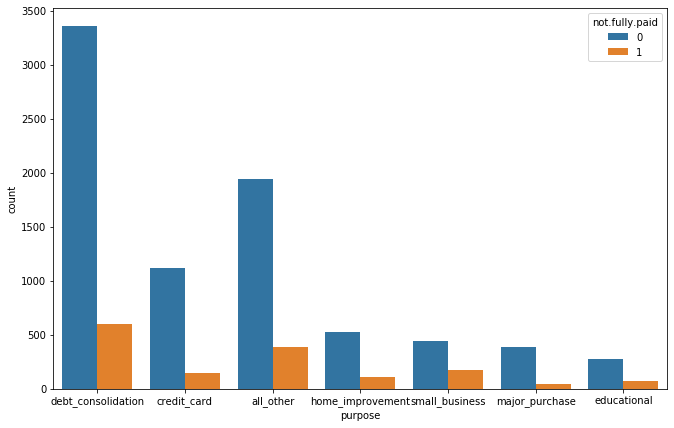

In [25]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',data=loans,hue='not.fully.paid')

In [30]:
loans[loans['purpose']=='debt_consolidation']['not.fully.paid'].value_counts()

0    3354
1     603
Name: not.fully.paid, dtype: int64

In [31]:
603/(3354+603)

0.15238817285822592

In [32]:
loans[loans['purpose']=='major_purchase']['not.fully.paid'].value_counts()

0    388
1     49
Name: not.fully.paid, dtype: int64

In [33]:
49/(388+49)

0.11212814645308924

In [34]:
loans[loans['purpose']=='small_business']['not.fully.paid'].value_counts()

0    447
1    172
Name: not.fully.paid, dtype: int64

In [35]:
172/(447+172)

0.2778675282714055

In [36]:
loans[loans['purpose']=='credit_card']['not.fully.paid'].value_counts()

0    1116
1     146
Name: not.fully.paid, dtype: int64

In [37]:
146/(1116+146)

0.11568938193343899

<div style="direction:rtl">
نمودار جوینت پلات را بر حسب دو فیچر fico و int.rate ترسیم نمایید.

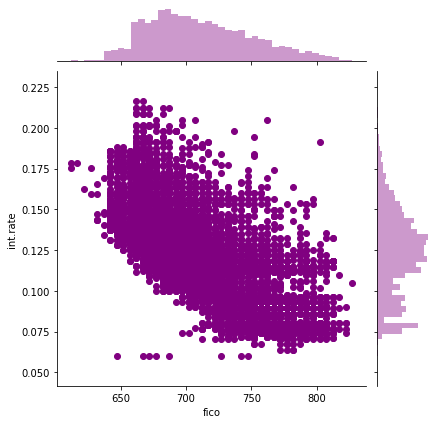

In [41]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

<div style="direction:rtl">
 خب به نظر می آید که یک همبتسگی کشف کردیم، برای بررسی دقیق تر این همبستگی ها، نمودار lmplot بر حسب fico و با دو ستون مختلف بر اساس این که وام پرداخت شده یا خیر و با تفکیک credit.policy رسم کنید.

<Figure size 792x504 with 0 Axes>

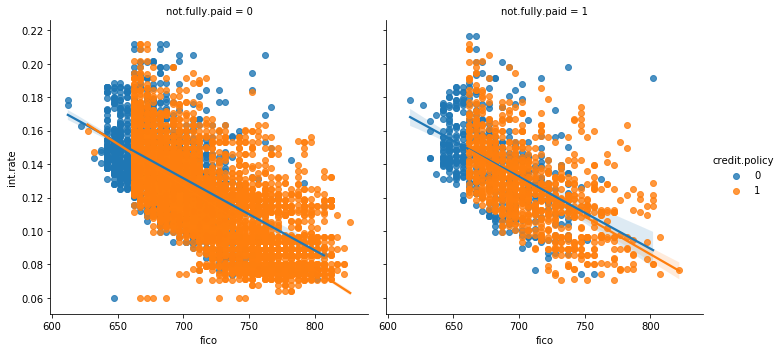

In [44]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',col='not.fully.paid')

<Figure size 792x504 with 0 Axes>

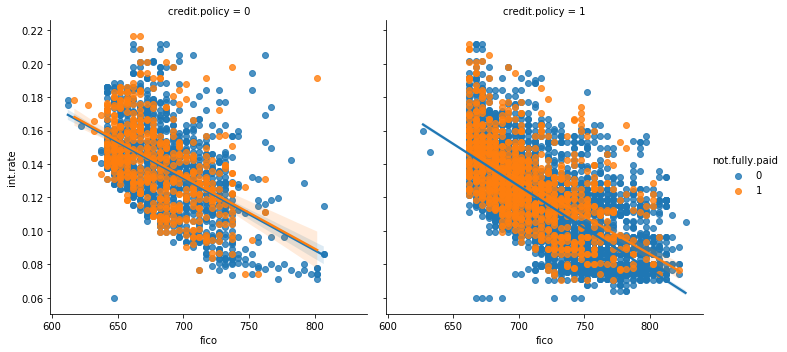

In [46]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='not.fully.paid',col='credit.policy')

<div style="direction:rtl">
چه نتیجه ای می گیرید؟

<div style="direction:rtl">
نتیجه این که :

# Setting up the Data

## Categorical Features

<div style="direction:rtl">
فیچر های کتگوریکال را به نومریک تبدیل می کنیم.

In [45]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [58]:
pd.concat([loans.drop(['purpose'],axis=1),pd.get_dummies(loans['purpose'],drop_first=True)],axis=1)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [67]:
final_data = pd.get_dummies(loans,columns=['purpose'],drop_first=True)
final_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


## Train Test Split


<div style="direction:rtl">
داده های مان را به دو بخش آموزش و تست تقسیم می کنیم.

In [66]:
from sklearn.model_selection import train_test_split

In [68]:
X = final_data.drop('not.fully.paid',axis=1)
y =final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Training a Decision Tree Model

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dtree = DecisionTreeClassifier()

In [71]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Predictions and Evaluation of Decision Tree

In [72]:
pred = dtree.predict(X_test)

In [73]:
from sklearn.metrics import classification_report,confusion_matrix

In [75]:
pd.DataFrame({'Label':y_test,'Predictions':pred})


,Label,Predictions
5244,0,0
1739,0,1
2780,0,0
7062,0,0
6661,0,0
...,...,...
9508,0,0
4348,0,1
4233,0,0
5363,0,0


In [76]:
print(dtree.score(X_test,y_test))

0.7313848295059151


In [77]:
print(confusion_matrix(y_test,pred))

[[2005  426]
 [ 346   97]]


In [78]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.22      0.20       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



## Training the Random Forest model

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rfc = RandomForestClassifier(n_estimators=600)

In [81]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Predictions and Evaluation of Random Forest

In [82]:
pred = rfc.predict(X_test)

In [83]:
pd.DataFrame({'Label':y_test,'Predictions':pred})

,Label,Predictions
5244,0,0
1739,0,0
2780,0,0
7062,0,0
6661,0,0
...,...,...
9508,0,0
4348,0,0
4233,0,0
5363,0,0


In [84]:
print(rfc.score(X_test,y_test))

0.8462073764787752


In [85]:
print(confusion_matrix(y_test,pred))

[[2422    9]
 [ 433   10]]


In [86]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.53      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.69      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



<div style="direction:rtl">
با استفاده از ویژگی rfc.feature_importances_، مهم ترین فیچر های دخیل در این پبشبینی را نمایش دهید.

In [93]:
pd.DataFrame({'Features':X.columns,'Values':rfc.feature_importances_}).sort_values('Values',ascending=False)

,Features,Values
2,installment,0.115552
6,days.with.cr.line,0.113668
8,revol.util,0.113560
7,revol.bal,0.112112
4,dti,0.108866
3,log.annual.inc,0.108304
1,int.rate,0.103020
5,fico,0.078284
9,inq.last.6mths,0.053728
0,credit.policy,0.016883


<div style="direction:rtl">

## موفق باشید :)